In [28]:
import torch

inputs = torch.tensor(
 [[0.43, 0.15, 0.89], # Your (x_1)
 [0.55, 0.87, 0.66], # journey (x_2)
 [0.57, 0.85, 0.64], # starts (x_3)
 [0.22, 0.58, 0.33], # with (x_4)
 [0.77, 0.25, 0.10], # one (x_5)
 [0.05, 0.80, 0.55]] # step (x_6)
)

In [12]:
#How intermediate attention scores between the query token and each input token calculate

#Calcualting attention scores for input_2(x_2)

query= inputs[1] # x_2
scores= torch.zeros(inputs.shape[0])
for idx, input in enumerate(inputs):
    scores[idx]= torch.dot(input, query) #dot product is the sum of pairwise multiplication
scores      

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

In [13]:
# Dot product 
query= inputs[1]
scores=torch.zeros(inputs.shape[0])
for idx, input in enumerate(inputs):
    for id, w in enumerate(inputs[idx]):
        scores[idx] += w * query[id]
                
weights= scores/scores.sum()  
print(scores)
print(weights)

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])


In [14]:
"""

 the dot product is a measure of similarity because it quantifies how closely two vectors are aligned:
 a higher dot product indicates a greater degree of alignment or similarity between the vectors.
 In the context of self-attention mechanisms, 
 the dot product determines the extent to which each element in a sequence focuses on,
 or “attends to,” any other element: the higher the dot product,
 the higher the similarity and attention score between two elements.
 
"""

'\n\n the dot product is a measure of similarity because it quantifies how closely two vectors are aligned:\n a higher dot product indicates a greater degree of alignment or similarity between the vectors.\n In the context of self-attention mechanisms, \n the dot product determines the extent to which each element in a sequence focuses on,\n or “attends to,” any other element: the higher the dot product,\n the higher the similarity and attention score between two elements.\n\n'

scalar multilication:
<br/>
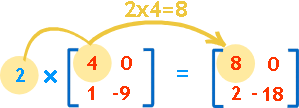


matrix multiplication:
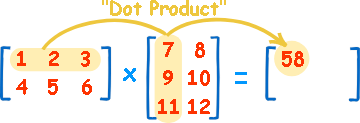
(1, 2, 3) • (7, 9, 11) = 1×7 + 2×9 + 3×11
    = 58

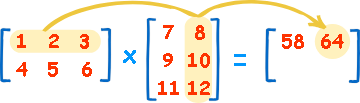

(1, 2, 3) • (8, 10, 12) = 1×8 + 2×10 + 3×12
    = 64


    We can do the same thing for the 2nd row and 1st column:

(4, 5, 6) • (7, 9, 11) = 4×7 + 5×9 + 6×11
    = 139

And for the 2nd row and 2nd column:

(4, 5, 6) • (8, 10, 12) = 4×8 + 5×10 + 6×12
    = 154

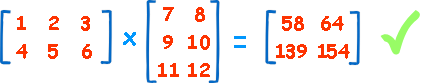

And we get:


Matrix Multiply Finished

DONE!

In [24]:
def softmax(x):
    return torch.exp(x) / torch.exp(x).sum(dim=0)

softmax(scores)

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [25]:
weights= torch.softmax(scores, dim=0)
weights

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

In [ ]:
#calculating contex vector Z for x_2
#query == x_2

context_x2 = torch.zeros(query.shape)
for i, embeded_vector_x in enumerate(inputs):
    context_x2 +=  embeded_vector_x * weights[i]

context_x2     

tensor([0.4419, 0.6515, 0.5683])

calculating simple attention for input x_1
<br/>
step 1=- calculate intermediate scores: dot product of the vector x_1 by all others, get logits 
<br/>
step 2 = convert intermediate scores to attention weights == apply softmax to all values obtained in step 1
<br/>
step 3 = create context vector for x_1== sum all multiplication of other inputs vectors to attention weights
<br/> 

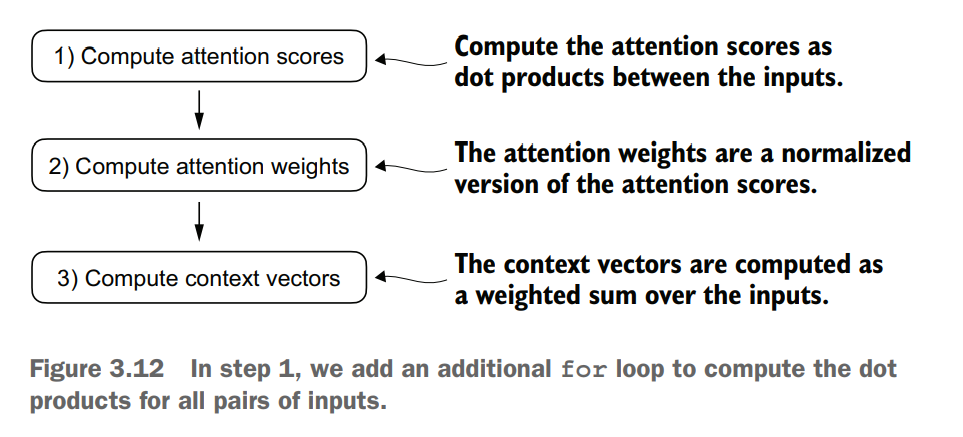

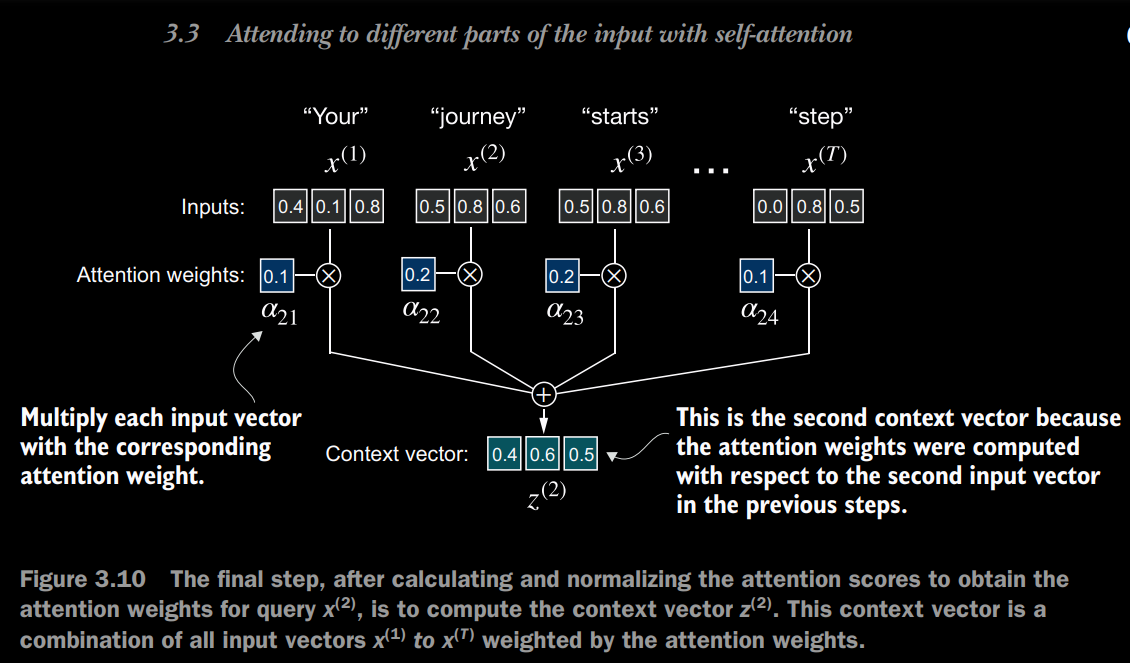

In [61]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [62]:
inputs.T

tensor([[0.4300, 0.5500, 0.5700, 0.2200, 0.7700, 0.0500],
        [0.1500, 0.8700, 0.8500, 0.5800, 0.2500, 0.8000],
        [0.8900, 0.6600, 0.6400, 0.3300, 0.1000, 0.5500]])

In [ ]:
# Calculate context vector for all inputs
attention_scores= torch.zeros((6,6))
for i , x_i in enumerate(inputs):
    for j, x_j in enumerate(inputs):
        attention_scores[i,j] =  torch.dot(x_i, x_j)
        
attention_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [48]:
#matrix multiplication
attention_scores= inputs @ inputs.T

In [56]:
attn_weights= torch.softmax(attention_scores, dim=1)
attn_weights

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [60]:
context_vec = attn_weights @ inputs
context_vec

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

In [85]:
attn_weights * torch.tril(torch.ones(attn_weights.shape),diagonal=0)  


tensor([[0.2098, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1385, 0.2379, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.1390, 0.2369, 0.2326, 0.0000, 0.0000, 0.0000],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.0000, 0.0000],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.0000],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [ ]:
mask= torch.triu(torch.ones(6,6),diagonal=1)  
mask

tensor([[0.0000, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.0000, 0.0000, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.0000, 0.0000, 0.0000, 0.1242, 0.1108, 0.1565],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.1263, 0.1720],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.1295],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000]])

In [174]:
torch.masked_fill(mask, mask.bool(), - torch.inf) + attn_weights

tensor([[0.2098,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.1385, 0.2379,   -inf,   -inf,   -inf,   -inf],
        [0.1390, 0.2369, 0.2326,   -inf,   -inf,   -inf],
        [0.1435, 0.2074, 0.2046, 0.1462,   -inf,   -inf],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879,   -inf],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [175]:
attn_weights.masked_fill(mask.bool(), -torch.inf)

tensor([[0.2098,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.1385, 0.2379,   -inf,   -inf,   -inf,   -inf],
        [0.1390, 0.2369, 0.2326,   -inf,   -inf,   -inf],
        [0.1435, 0.2074, 0.2046, 0.1462,   -inf,   -inf],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879,   -inf],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

In [ ]:
torch.nn.Module.register_buffer

In [123]:
input2 = torch.stack([inputs,inputs, inputs, inputs])
input2.shape

torch.Size([4, 6, 3])

In [136]:
input2= input2.view(12,6) 
input2.shape

torch.Size([12, 6])

In [131]:
input2.transpose(1,-2).shape

torch.Size([2, 2, 2, 3, 3])

In [150]:
input2.T.is_contiguous()

False

In [180]:
x= torch.tensor([[1, 1, 1 ],
                 [2, 2, 2 ],
                 [3, 3, 3 ]])

In [187]:
x= torch.rand((2,10,6))
x

tensor([[[6.1479e-01, 1.6422e-01, 2.1687e-01, 8.9113e-01, 6.2690e-01,
          4.9930e-01],
         [5.0810e-02, 5.3095e-01, 1.5166e-01, 3.5570e-01, 6.7702e-01,
          3.3847e-01],
         [6.4365e-02, 1.7507e-02, 9.5524e-01, 2.4519e-01, 1.7915e-01,
          2.7332e-01],
         [2.9640e-01, 5.2232e-01, 2.6607e-01, 8.6036e-01, 2.6154e-01,
          6.5189e-01],
         [7.9144e-01, 8.9561e-01, 8.0422e-01, 8.9616e-01, 6.6408e-01,
          6.6159e-01],
         [4.5847e-02, 6.0757e-01, 2.0428e-02, 2.2661e-01, 9.7681e-01,
          4.5350e-01],
         [9.8602e-01, 3.5128e-01, 9.3369e-01, 8.1329e-01, 7.1372e-01,
          7.2794e-01],
         [6.2489e-01, 2.8090e-01, 5.3275e-01, 8.4141e-01, 7.7649e-01,
          7.1967e-01],
         [8.7512e-04, 9.3473e-01, 7.2399e-01, 2.4547e-01, 4.3515e-01,
          5.0823e-01],
         [3.0173e-01, 7.1191e-01, 4.1757e-01, 9.0082e-01, 5.7255e-01,
          2.5338e-01]],

        [[6.3578e-01, 1.3673e-01, 5.5901e-01, 7.6923e-01, 8.3667e-04

In [ ]:
x.tran

torch.Size([2, 10, 6])